# Week5 - Logistic Regression Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets import make_classification

def create_df():    
    X, y = make_classification(n_samples=500, n_features=5, n_informative=3, random_state=42)
    df = pd.DataFrame(X)
    df['target'] = y
    return df

df = create_df()

In [4]:
df.head(5)

,0,1,2,3,4,target
0,0.280056,-1.126421,-0.772964,2.060626,-2.357044,0
1,-0.326002,0.343967,1.535987,-1.794578,1.293605,1
2,-0.802972,-1.112616,-1.088524,0.668720,-1.183952,0
3,0.012285,-0.350602,-1.359103,1.234112,-0.909008,0
4,0.043145,-1.077267,-0.873334,1.727960,-2.031498,0


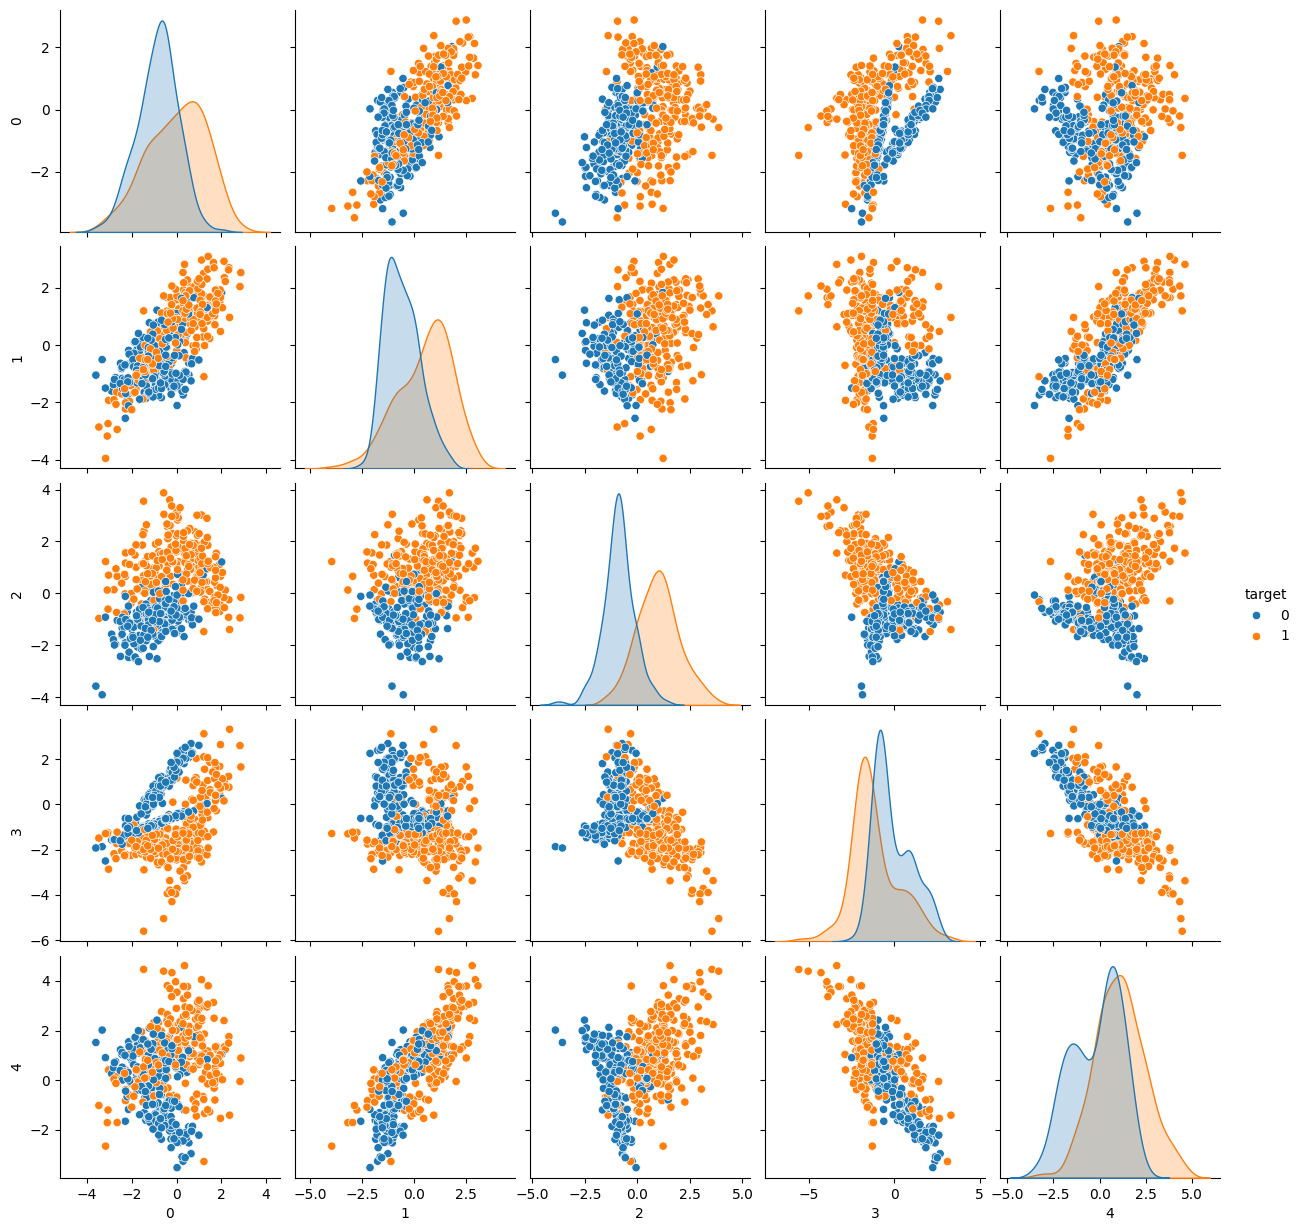

In [3]:
sns.pairplot(df, hue='target')

From this dataset it appears that all features can be used, because when the features are plotted against each other, there appears to be some linear separation between each of the features in some way.

In [6]:
#Train test split

features = [0, 1, 2, 3, 4]
X = df[features]
y = df['target']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 400
Test samples: 100


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

num_vars = [0, 1, 2, 3, 4]

num_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars)
])

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('logreg', LogisticRegression(penalty=None))]
)

modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('logreg', LogisticRegression(penalty=None))])

In [10]:
model = modeling_pipeline.fit(X_training, y_training)

In [14]:
y_hatp = model.predict_proba(X_test)
y_hat = model.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        49
           1       0.88      0.90      0.89        51

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_hatp[:,1])

0.9511804721888755

Because the ROC score is close to 1, this means that the model is a very strong model.